# Assignment 4: PCA

Srinivas Dengle

## Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups and you want to see if using PCA can help. In the end you will need to provide a description of each group to be used by the marketing strategists.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics


# 1. Data:

## 1A

In [79]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Explaining the columns: <br>

CUST_ID: ID number of the customer <br>
BALANCE:Balance a person carries <br>
BALANCE_FREQUENCY:How often balance is updated <br>
PURCHASES: How much a person spent their money <br>
ONEOFF_PURCHASES: Maximum amount of purchase done in one go <br>
INSTALLMENTS_PURCHASES:  This refers to the amount spent on purchases made in installments. <br>
ONEOFF_PURCHASES_FREQUENCY: This indicates the frequency of one-off purchases (1 denoting frequent, 0 denoting infrequent).<br>
PURCHASES_INSTALLMENTS_FREQUENCY: This reflects how often purchases in installments are made (1 denoting frequent, 0 denoting infrequent).<br>	
CASH_ADVANCE_FREQUENCY: It represents the frequency of cash advances being paid.<br>
CASH_ADVANCE_TRX: This indicates the number of transactions made with "Cash in Advance." <br>
PURCHASES_TRX: This signifies the number of purchase transactions made.<br>
CREDIT_LIMIT: It represents the credit card limit for the user.<br>
PAYMENTS: This denotes the total amount of payments made by the user.<br>
MINIMUM_PAYMENTS:  It signifies the minimum amount of payments made by the user.<br>
PRC_FULL_PAYMENT: This indicates the percentage of the full payment made by the user.<br>
TENURE: It represents the duration of the credit card service for the user.<br>

In [80]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Based on the statistics, the maximum balance on the card is around 19043.13856 which is quite a lot. Based on the data most of the people only do the minimum payments instead of paying it in full before the payment due date.

Here is the quantative description of the dataset:

Balance: The average account balance is approximately $1,564.47, with a wide range from $0 to $19,043.14.

Balance Frequency: Customers, on average, maintain a balance frequently, with a mean of approximately 0.877.

Purchases: The average purchase amount is around $1,003.20, with a broad variation and a maximum purchase of $49,039.57.

One-off Purchases: Customers, on average, make one-off purchases of about $592.44, with some individuals making exceptionally large one-off purchases.

Installments Purchases: The average installments purchase is approximately $411.07.

Cash Advance: Customers, on average, have taken cash advances of about $978.87, with a wide range of cash advance behavior.

Purchase Frequency: The average purchase frequency is 0.490, indicating that customers make purchases relatively often.

One-off Purchase Frequency: On average, customers make one-off purchases about 20.2% of the time.

Purchase Installments Frequency: The average frequency of making purchases in installments is 36.4%.

Cash Advance Frequency: Customers, on average, engage in cash advances about 13.5% of the time.

Cash Advance Transactions: On average, customers have about 3.25 cash advance transactions, with a maximum of 123.

Purchase Transactions: Customers, on average, make around 14.71 purchase transactions, with a maximum of 358.

Credit Limit: The average credit limit is $4,494.45, with a wide range of credit limits available.

Payments: The average payment made by customers is approximately $1,733.14, with a maximum payment of $50,721.48.

Minimum Payments: The average minimum payment due is approximately $864.21, with a wide variation.

Percentage of Full Payment: On average, customers tend to pay about 15.4% of their balance in full.

Tenure: The average tenure of customers is approximately 11.52 months, with a minimum of 6 months and a maximum of 12 months.

## 1B

In [81]:
df.shape

(8950, 18)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [83]:
# changing data types to float
df["CASH_ADVANCE"] = df["CASH_ADVANCE"].astype(float)
df["CASH_ADVANCE_TRX"] = df["CASH_ADVANCE_TRX"].astype(float)
df["PURCHASES_TRX"] = df["PURCHASES_TRX"].astype(float)
df["TENURE"] = df["TENURE"].astype(float)

In [84]:
# double checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

In the above cells I used .info() to check for incorrect data types. There were a few incorrect data types and i changed all of them to float64 to less complicate things later down in the code. After that I doubled checked it by using the .info() again.

In [85]:
# checking for null values in each rows
df.isnull().sum().to_frame("nulls")

nulls
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0

In [86]:
# dropping the null values
df.dropna(inplace=True)

# comparing the shape to the shape before dropping the null values
df.shape

(8636, 18)

In the above cells i checked for any missing values and there were 313 missing values in the "missing payments" column. I dropped all the null value as it will cause problem during training.

In [87]:
# checking for duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

#### Summary of 1b

.info() <br>
After checking the dataset and comparing with the output i concluded all of the data types are correct. 

df.isnull().sum().to_frame("nulls") - Checking for null values <br>
There were a total 313 null values in the "minimum_payments" column.

df.dropna() <br>
I used this function to drop call the null values.

df[df.duplicated()] <br>
Checked for duplicates and there were none.

## 1C

In [88]:
# dropping 'cust_id' column as we dont need it.
df1 = df.drop(columns=["CUST_ID"])

# checking the dataset after dropping the column
df1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00               0.0            2.0        1000.0   
1                    0.25               4.0            0.0        7000.0   
2                    0.00               0.0           12.0        7500.0   
4                    0.00               0.0            1.0        1200.0   
5                    0.00               0.0            8.0        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000    12.0  
1  4103.032597       1072.340217          0.222222    12.0  
2   622.066742        627.284787          0.000000    12.0  
4   678.334763        244.791237          0.000000    12.0  
5  1400.057770       2407.246035          0.000000    12.0

<AxesSubplot: >

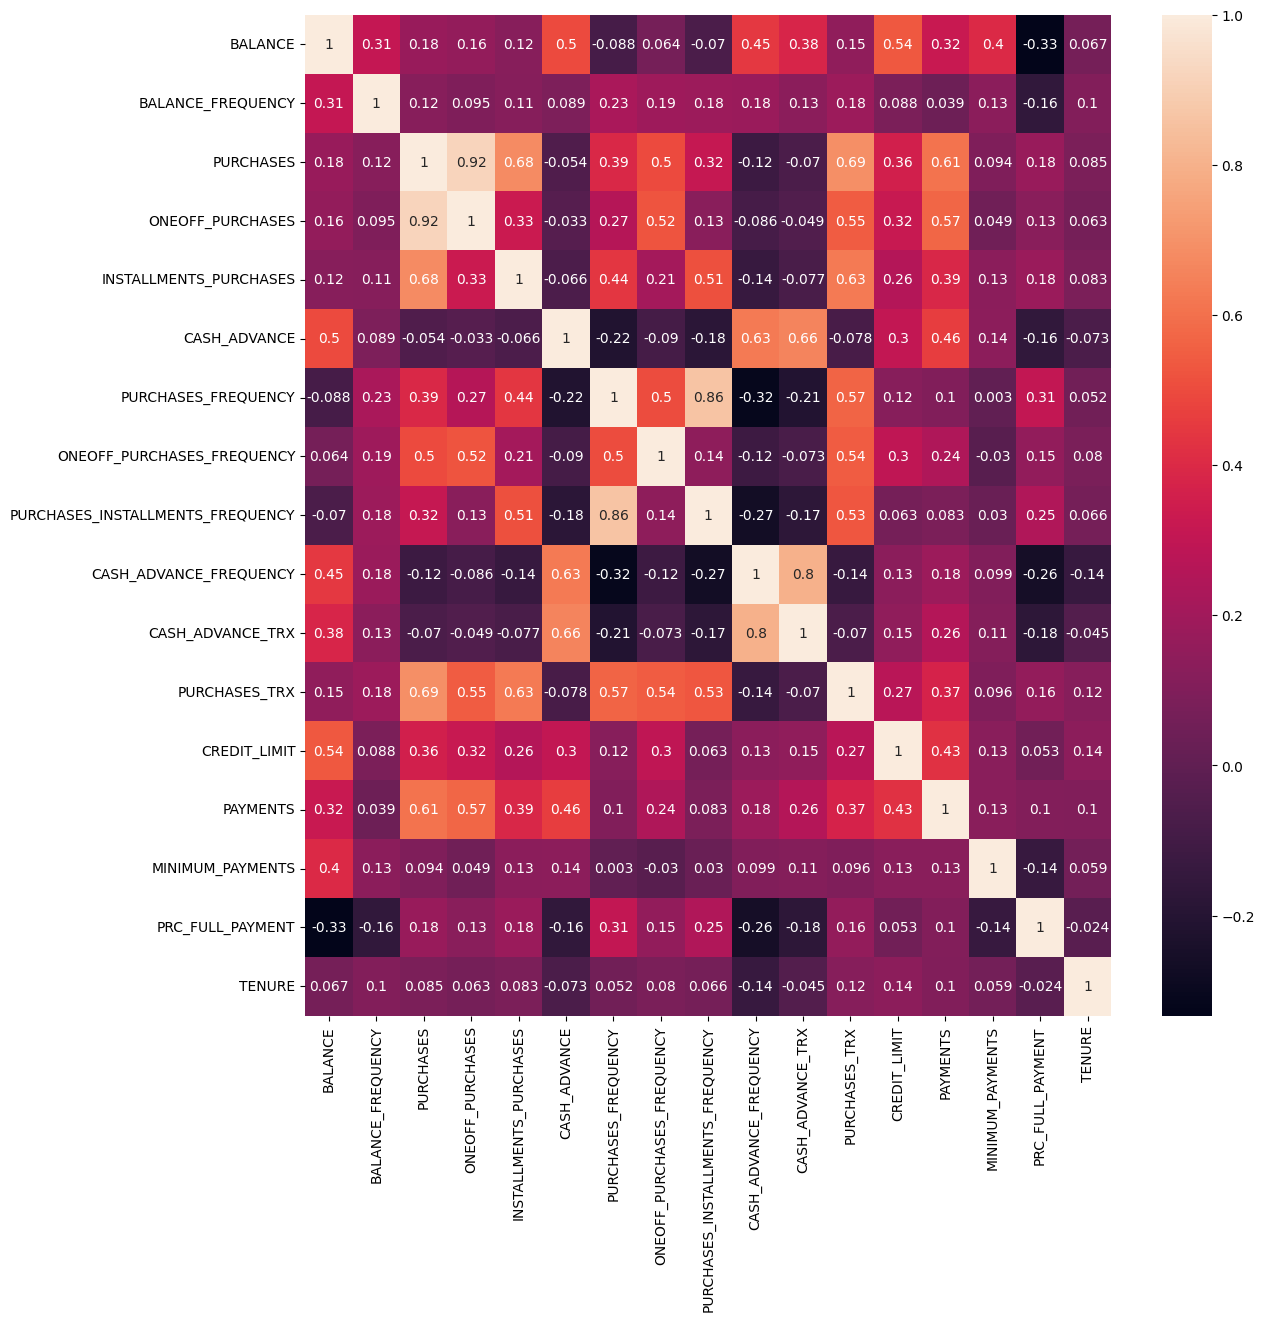

In [89]:
# using the corr function to find the correlation between each column
corr = df1.corr()

# plotting a heatmap using corr function
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True)

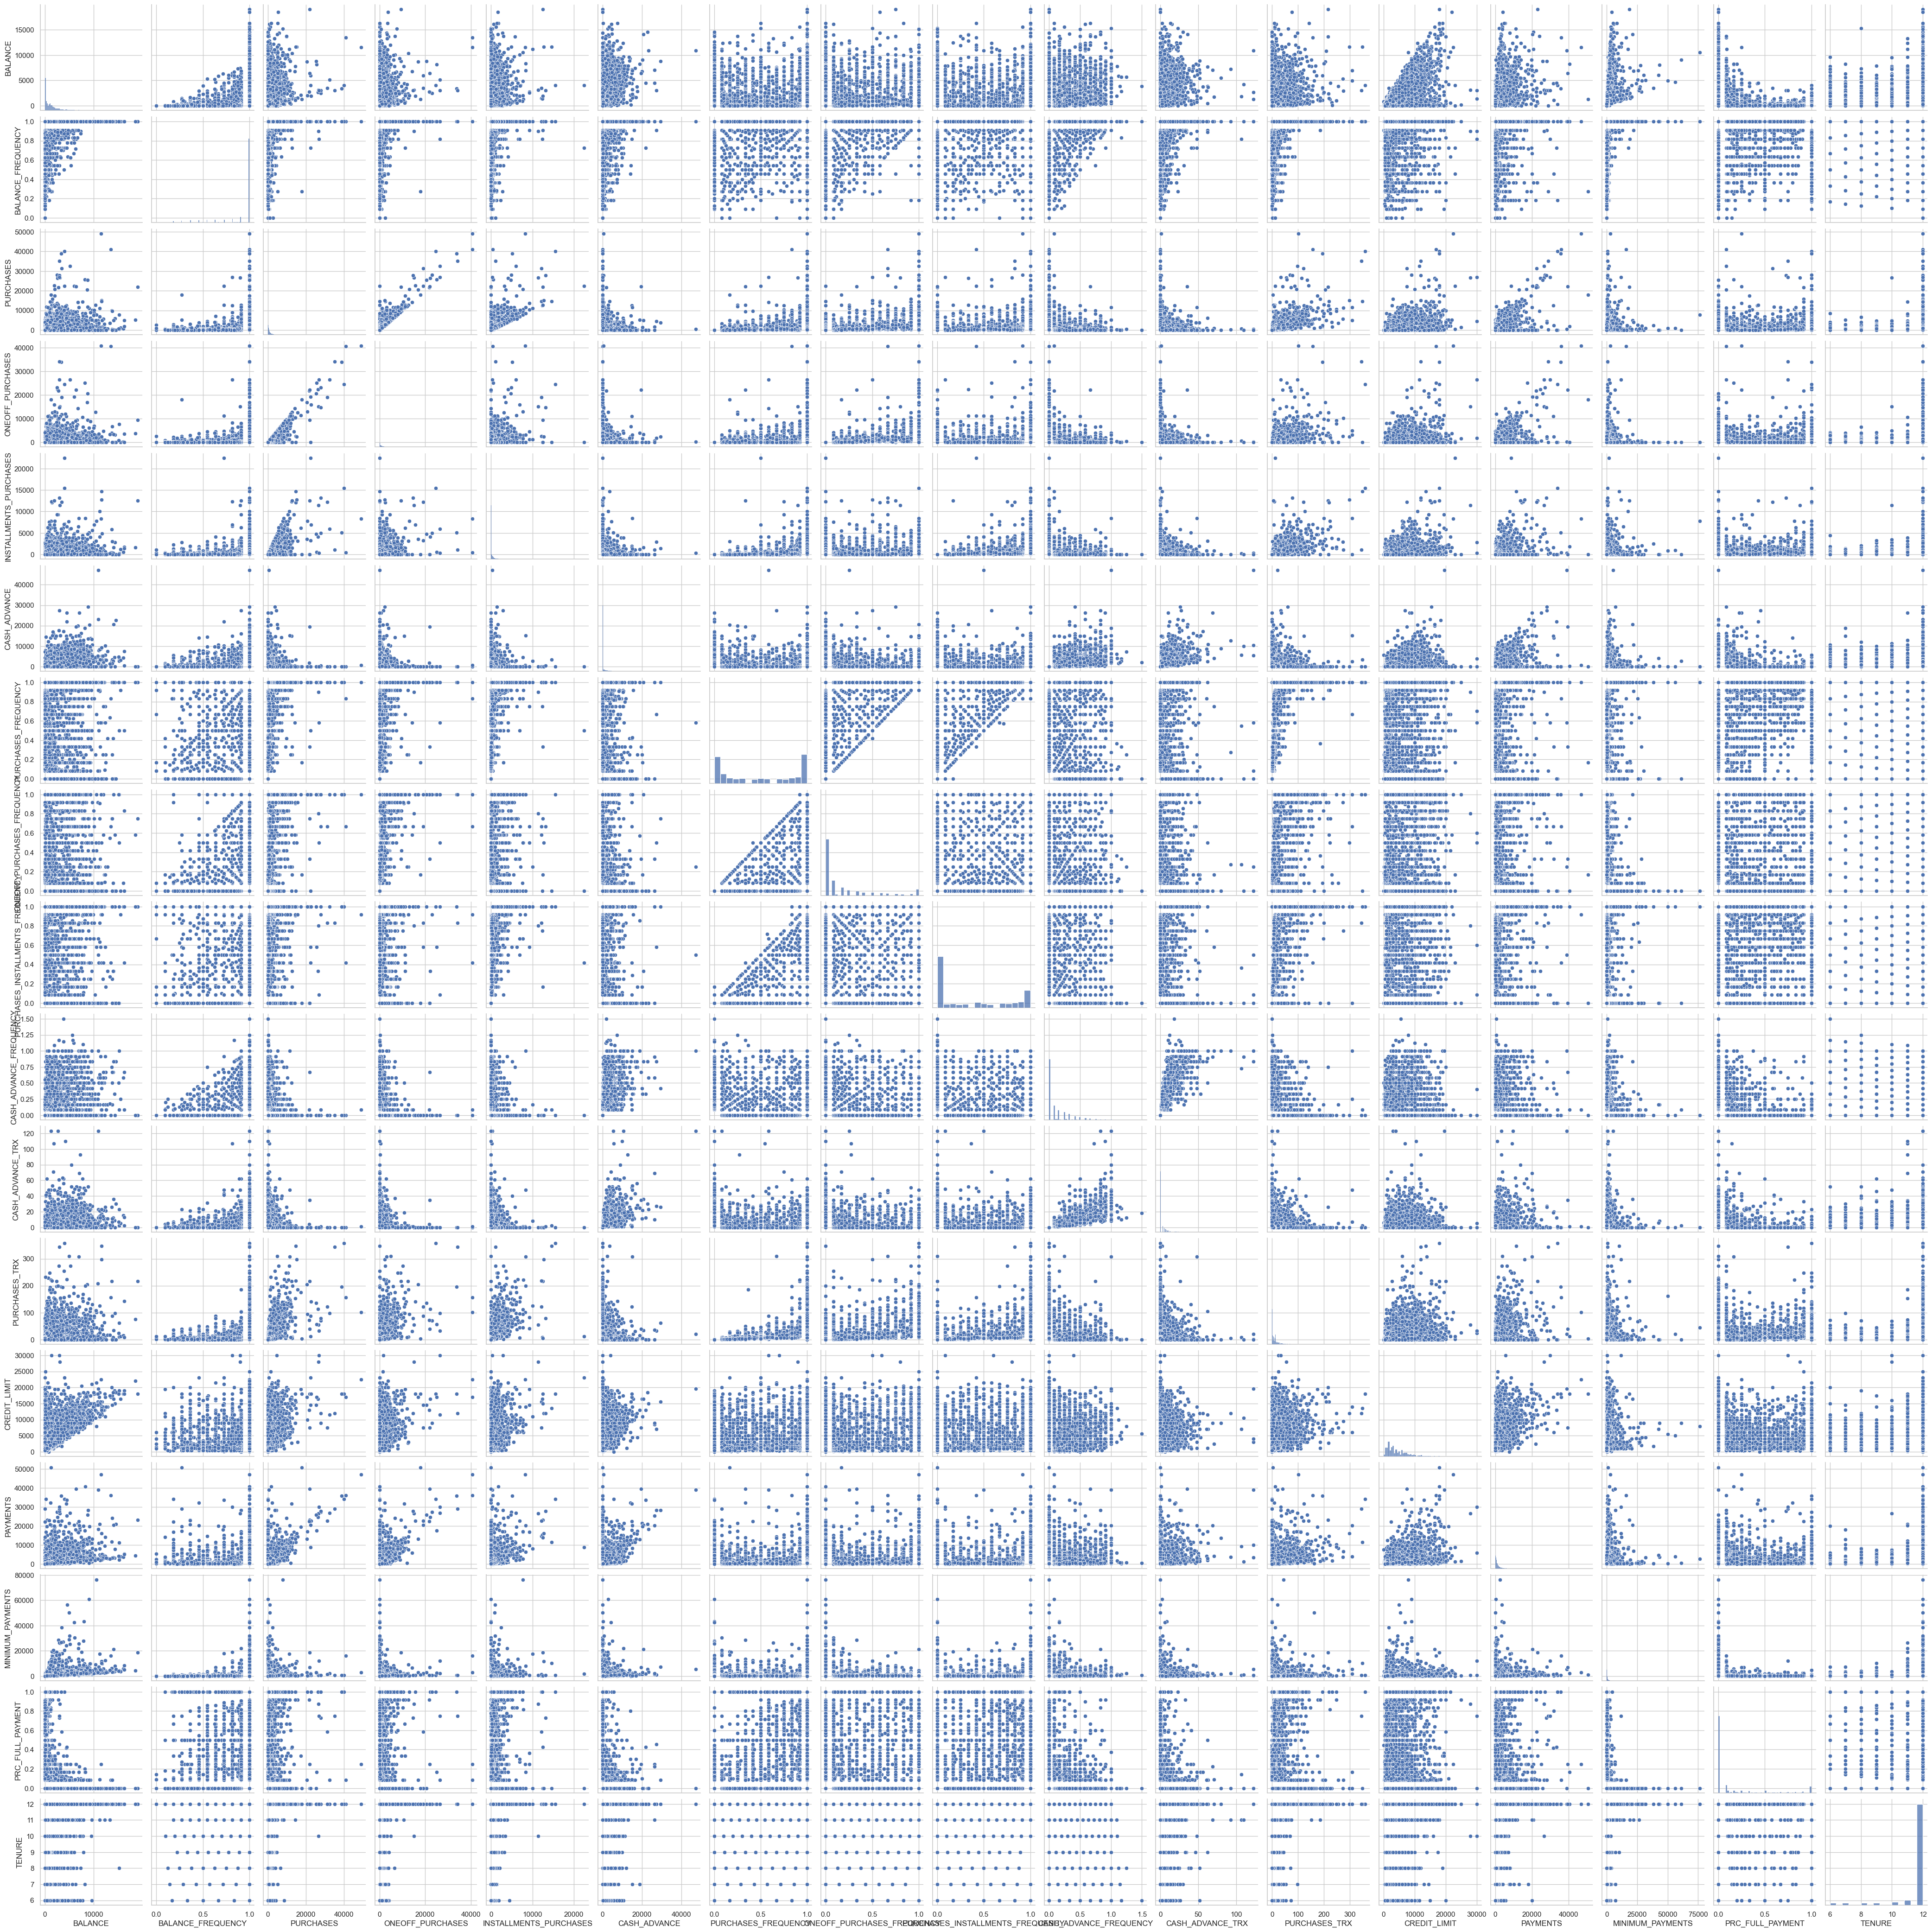

In [221]:
sns.pairplot(df1)

Explaination for heatmap:

This heapmap gives the correlation between the all the coloumns which will help determine which column has the most impact with one another. For example: 'Credit_Limit' and 'Payments' are nearly 43% correlated with each other.

Explaination for pairplot

The pairplot will help us find any outliers and interesting pattern between columns. The pairplot will help you visualize/ explore the relationship based on the graphical representation.

# 2. PCA
## 2A

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
df_scaled = pd.DataFrame(scaled_data, columns=df1.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.042940           1.000000   0.000326          0.000393   
4  0.095038           1.000000   0.027188          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004240      0.000000             0.166667   
1                0.000000      0.136685             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.000000             0.083333   
4                0.059257      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.000000           0.00000       0.002793      0.038397   
4                0.000000           0.00000       0.022346      0.058431   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003978          0.001826          0.000000     1.0  
1  0.080892          0.014034          0.222222     1.0  
2  0.012263          0.008210          0.000000     1.0  
3  0.013373          0.003204          0.000000     1.0  
4  0.027602          0.031506          0.000000     1.0

## 2B

In [118]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_scaled)
# Calculating the explained variance ratios for each principal component
exp = pca.explained_variance_ratio_ 
# Calculate the cumulative sum of explained variance
exp_cumsum = exp.cumsum()
# 6
for i in exp_cumsum:
    if i < 0.95:
        print(i)

0.5039552324985364
0.6457369878039186
0.778649539999091
0.8520811879460013
0.9092805903242105
0.9456726233144032


## 2C

In [137]:
# using pca with the number of components i found in 2B.
pca1 = PCA(n_components=6)
pca1_trans= pca1.fit_transform(df_scaled)
pca1_tran = pca1.explained_variance_ratio_
df_pca1 = pd.DataFrame(pca1_trans)
df_pca1

0         1         2         3         4         5
0    -0.492046 -0.106987 -0.024615 -0.089864  0.126580 -0.152617
1    -0.620691 -0.030137  0.111544 -0.144935 -0.165132  0.119542
2     0.291581  0.922922 -0.133906  0.055884  0.161039 -0.148840
3    -0.567819  0.023027 -0.070132 -0.106490 -0.026971 -0.208099
4     0.188140 -0.249456 -0.228906 -0.072851  0.012116 -0.124724
...        ...       ...       ...       ...       ...       ...
8631 -0.563051 -0.056264  0.207772  0.924840  0.277707 -0.056051
8632  0.641651 -0.439862  0.267982  0.858736 -0.249899 -0.167111
8633  0.357222 -0.397023  0.144246  0.895518 -0.038943 -0.124308
8634 -0.650113 -0.170495  0.310374  0.838894 -0.162530 -0.109624
8635 -0.096259  0.454804  0.094945  1.027593  0.191610 -0.045472

[8636 rows x 6 columns]

# 3. Cluster:
## 3A

### K-means

In [138]:
# Initialize variables
silhouette_scores = []

best_cluster_k = 0
best_score_k = -1

# Using for loop to loop through the range of numbers
for c in range(2, 11):
    kmeans = KMeans(n_clusters=c, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca1)  # Generate cluster labels
    score = silhouette_score(df_pca1, cluster_labels)
    k_hyper = {
        "Clusters": c,
        "silhouette score": score
    }
    silhouette_scores.append(k_hyper)

k_means_df = pd.DataFrame(silhouette_scores)


c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

In [139]:
k_means_df

Clusters  silhouette score
0         2          0.412800
1         3          0.398973
2         4          0.400877
3         5          0.348255
4         6          0.366681
5         7          0.349786
6         8          0.359629
7         9          0.375375
8        10          0.380053

### Hierarchical Clustering

In [140]:
# DEFINING HYPERPARAMETERS
n_clusters_list = [3, 4, 5]
metric_list = ['euclidean', 'manhattan']
linkage_list = ['complete', 'average', 'single', 'ward']
distance_threshold_list = [None]

# initializing all the variables
results = []
best_score = -1

for n in n_clusters_list:
    for metric in metric_list:
        for l in linkage_list:
            if n is not None and l == 'ward':
                continue

            # Creating and fitting the Agglomerative Clustering model with n_clusters
            model = AgglomerativeClustering(n_clusters=n, affinity=metric, linkage=l)
            labels = model.fit_predict(df_pca1)

            # CALCULATING A SILHOUETTE SCORE
            if len(np.unique(labels)) > 1:
                silhouette_avg = silhouette_score(df_pca1, labels)
            else:
                silhouette_avg = np.nan

            # CREATING A DICTIONARY
            hyperparameters = {
                "n_clusters": n,
                "distance_threshold": None,
                "metric": metric,
                "linkage": l,
                "silhouette_score": silhouette_avg
            }
            results.append(hyperparameters)


c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Sri

In [125]:
model.get_params()

{'affinity': 'manhattan',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'single',
 'memory': None,
 'metric': None,
 'n_clusters': 5}

In [216]:
clustering = pd.DataFrame(results)


### DBSCAN

In [166]:
# creating a list of hyperparameters
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [2, 3, 4, 5, 6, 7]
metric_values = ['euclidean', 'manhattan']
p_values = [1, 2]

db_results = []
best_score = -1
best_model = None

# Create a function for hyperparameter tuning
def tune_hyperparameters(eps_values, min_samples_values, metric_values, p_values):
    global best_score, best_model
    for eps in eps_values:
        for min_samples in min_samples_values:
            for metric_value in metric_values:
                for p in p_values:
                    # Create a DBSCAN model with specified hyperparameters
                    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric_value, p=p)
                    labels = dbscan.fit_predict(df_pca1)  # Use your data
                    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                    
                    # Calculate the silhouette score
                    silhouette_avg = 0 
                    if len(set(labels)) > 1: 
                        silhouette_avg = silhouette_score(df_pca1, labels)
                        if silhouette_avg > best_score:
                            best_score = silhouette_avg
                            best_model = dbscan

                    if best_model is not None:
                        noise_points = sum(1 for label in best_model.labels_ if label == -1)
                        hyper_params = {
                            "EPS": eps,
                            "Min_Samples": min_samples,
                            "Metric": metric_value,
                            "P": p,
                            "Noise": noise_points,
                            "Estimated # of Clusters": n_clusters,
                            "Silhouette Score": silhouette_avg
                        }
                        db_results.append(hyper_params)

tune_hyperparameters(eps_values, min_samples_values, metric_values, p_values)

In [215]:
dbscan_results = pd.DataFrame(db_results)

## 3B

In [168]:
n = dbscan_results[dbscan_results["Silhouette Score"] > 0.3]
n

EPS  Min_Samples     Metric  P  Noise  Estimated # of Clusters  \
0   0.5            2  euclidean  1      4                        1   
1   0.5            2  euclidean  2      4                        1   
4   0.5            3  euclidean  1      4                        1   
5   0.5            3  euclidean  2      4                        1   
8   0.5            4  euclidean  1      4                        1   
9   0.5            4  euclidean  2      4                        1   
12  0.5            5  euclidean  1      4                        1   
13  0.5            5  euclidean  2      4                        1   
16  0.5            6  euclidean  1      4                        1   
17  0.5            6  euclidean  2      4                        1   
20  0.5            7  euclidean  1      4                        1   
21  0.5            7  euclidean  2      4                        1   
26  1.0            2  manhattan  1      3                        1   
27  1.0            2  manhattan  2      3                        1   
30  1.0            3  manhattan  1      3                        1   
31  1.0            3  manhattan  2      3                        1   
34  1.0            4  manhattan  1      3                        1   
35  1.0            4  manhattan  2      3                        1   
38  1.0            5  manhattan  1      3                        1   
39  1.0            5  manhattan  2      3                        1   
42  1.0            6  manhattan  1      3                        1   
43  1.0            6  manhattan  2      3                        1   
46  1.0            7  manhattan  1      3                        1   
47  1.0            7  manhattan  2      3                        1   

    Silhouette Score  
0           0.342935  
1           0.342935  
4           0.342935  
5           0.342935  
8           0.342935  
9           0.342935  
12          0.342935  
13          0.342935  
16          0.342935  
17          0.342935  
20          0.342935  
21          0.342935  
26          0.383860  
27          0.383860  
30          0.383860  
31          0.383860  
34          0.383860  
35          0.383860  
38          0.383860  
39          0.383860  
42          0.383860  
43          0.383860  
46          0.383860  
47          0.383860

Selecting best model

In [169]:
# K-means clustering data
k_means_df

Clusters  silhouette score
0         2          0.412800
1         3          0.398973
2         4          0.400877
3         5          0.348255
4         6          0.366681
5         7          0.349786
6         8          0.359629
7         9          0.375375
8        10          0.380053

In [222]:
# Hierarchical Clustering. Here i chose agglomerative cluster
clustering

EPS  Min_Samples     Metric  P  Noise  Estimated # of Clusters  \
0   0.5            5  manhattan  1    174                        3   
1   0.5            5  manhattan  2    174                        3   
2   0.5            6  euclidean  1    174                        1   
3   0.5            6  euclidean  2    174                        1   
4   0.5            6  manhattan  1    196                        2   
..  ...          ...        ... ..    ...                      ...   
66  1.5           10  euclidean  1    196                        1   
67  1.5           10  euclidean  2    196                        1   
68  1.5           10  manhattan  1    196                        1   
69  1.5           10  manhattan  2    196                        1   
70  2.0            5  euclidean  1    196                        1   

    Silhouette Score  
0           0.087885  
1           0.087885  
2          -1.000000  
3          -1.000000  
4           0.182019  
..               ...  
66         -1.000000  
67         -1.000000  
68         -1.000000  
69         -1.000000  
70         -1.000000  

[71 rows x 7 columns]

In [171]:
# DBSCAN Data
n

EPS  Min_Samples     Metric  P  Noise  Estimated # of Clusters  \
0   0.5            2  euclidean  1      4                        1   
1   0.5            2  euclidean  2      4                        1   
4   0.5            3  euclidean  1      4                        1   
5   0.5            3  euclidean  2      4                        1   
8   0.5            4  euclidean  1      4                        1   
9   0.5            4  euclidean  2      4                        1   
12  0.5            5  euclidean  1      4                        1   
13  0.5            5  euclidean  2      4                        1   
16  0.5            6  euclidean  1      4                        1   
17  0.5            6  euclidean  2      4                        1   
20  0.5            7  euclidean  1      4                        1   
21  0.5            7  euclidean  2      4                        1   
26  1.0            2  manhattan  1      3                        1   
27  1.0            2  manhattan  2      3                        1   
30  1.0            3  manhattan  1      3                        1   
31  1.0            3  manhattan  2      3                        1   
34  1.0            4  manhattan  1      3                        1   
35  1.0            4  manhattan  2      3                        1   
38  1.0            5  manhattan  1      3                        1   
39  1.0            5  manhattan  2      3                        1   
42  1.0            6  manhattan  1      3                        1   
43  1.0            6  manhattan  2      3                        1   
46  1.0            7  manhattan  1      3                        1   
47  1.0            7  manhattan  2      3                        1   

    Silhouette Score  
0           0.342935  
1           0.342935  
4           0.342935  
5           0.342935  
8           0.342935  
9           0.342935  
12          0.342935  
13          0.342935  
16          0.342935  
17          0.342935  
20          0.342935  
21          0.342935  
26          0.383860  
27          0.383860  
30          0.383860  
31          0.383860  
34          0.383860  
35          0.383860  
38          0.383860  
39          0.383860  
42          0.383860  
43          0.383860  
46          0.383860  
47          0.383860

Based on the data above. I went with K-Means beacause it has the highest silhouette score and it is resonable for this use case. 

The best parameters where: n_clusters- 2 and silhouette score-0.412800

These parameters are good for clustering the data.

# 4. Conclusions
## 4A

c:\Users\Srinivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


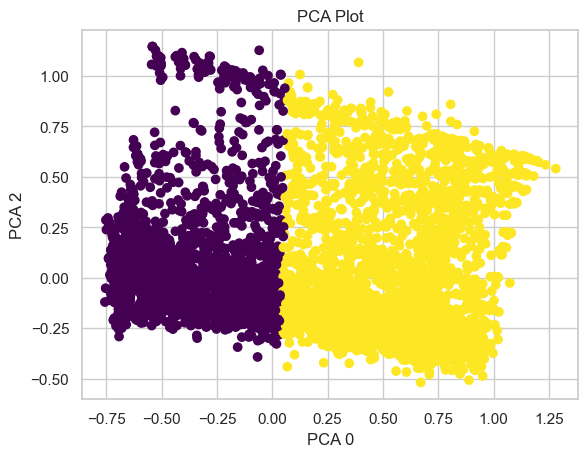

In [228]:
import matplotlib.pyplot as plt

# predicting clusters using kmeans as discussed earlier. i went with 2 clusters
kmeans1 = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans1.fit_predict(df_pca1)


# plotting a Scatter plot 
plt.scatter(df_pca1[0], df_pca1[2], c=kmeans_labels, cmap='viridis')
plt.xlabel('PCA 0')
plt.ylabel('PCA 2')
plt.title('PCA Plot')
plt.show()


For the scatter plot I used columns 0 and 2 and it dvides the data into two beautiful clusters and it is easy to differentiate that there are two clusters

## 4B

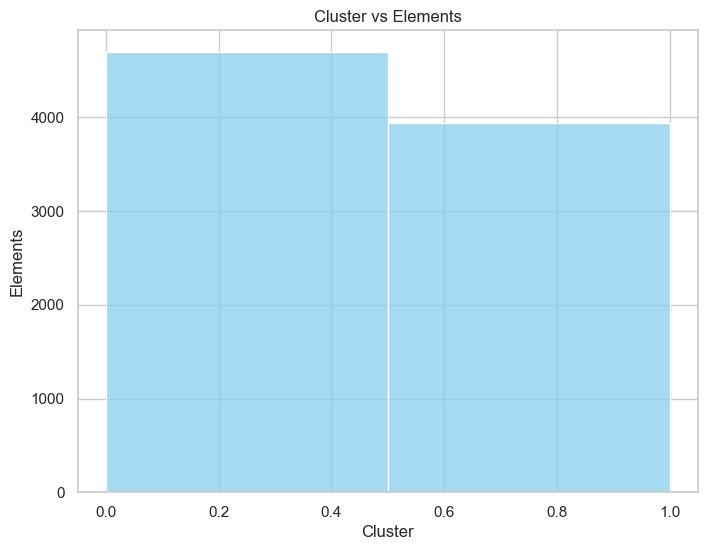

In [230]:
# Cluster vs Elements histogram
plt.figure(figsize=(8, 6))
sns.histplot(kmeans_labels, color='skyblue', bins=2)
plt.xlabel('Cluster')
plt.ylabel('Elements')
plt.title('Cluster vs Elements')
plt.show()

Here two bins are created because I have two clusters. 

In cluster 0 there are around 4600 people and in cluster 1 there are around 3900 people.

## 4C

In [207]:
# Create separate DataFrames for each cluster and describe them
for cluster_label in range(2):
    new_cluster_df = df[kmeans_labels == cluster_label]
    print(f"Cluster {cluster_label} Description:")
    print(pd.DataFrame(new_cluster_df).describe())
    print("\n")

Cluster 0 Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4694.000000        4694.000000   4694.000000       4694.000000   
mean    1754.097209           0.852763    328.692333        260.670072   
std     2063.754433           0.245421    877.149001        773.203480   
min        0.000000           0.000000      0.000000          0.000000   
25%      268.632395           0.818182      0.000000          0.000000   
50%     1109.607188           1.000000     65.775000          0.000000   
75%     2340.838765           1.000000    356.755000        231.752500   
max    16304.889250           1.000000  22500.000000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4694.000000   4694.000000          4694.000000   
mean                68.270098   1346.215556             0.162303   
std                416.039798   2259.894741             0.187521   
min                  0.000000      0.0

## 4D

### Cluster 0:

Description: Cluster 0 consists of a larger group of customers with moderate to low balance levels. They tend to make infrequent and lower-value purchases, and their credit limits are mid-range. These customers exhibit a more cautious approach to credit card usage, with many making infrequent purchases and having a low percentage of full payments.

### Cluster 1:

Description: Cluster 1 represents a smaller but distinctive group of customers who maintain higher balance levels, engage in frequent and substantial purchases, and have higher credit limits. They utilize their credit cards for both one-off and installment purchases, indicating diverse spending habits. This group also makes regular payments, including a higher percentage of full payments.

### Verdict / Strategy:
We would have to implement strategies to engage and activate the cluster 0 and it would be to encourage them to increase their purchase activity. Moreover, targeting them with new promotions and offers and make their credit utilization high. 
Cluster 1 is more of a baller. This cluster is a high spending. We would offer them exclusive promotions, loyalty programs, and personalized credit limit adjustments to nurture stronger loyalty, higher spending, and enhanced overall satisfaction.